In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

c:\Users\sevi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = fix_data(df, drop_zeros=False)

In [3]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


In [4]:
df.columns

Index(['StartDate', 'reading', 'Duration', 'Progress', 'Finished', 'Q42',
       'Q43', 'Q1', 'Q1_7_TEXT', 'Q2', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q4_1',
       'Q4_2', 'Q4_3', 'Q4_4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5',
       'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3',
       'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q17', 'Q18',
       'Q46'],
      dtype='object')

In [5]:
# drop everything but Q1 and Q5
df = df[['Q1', 'Q5']]

# RELEVANT DATA

In [6]:
df['Q1']

0      Industry
1      Industry
2      Academic
3      Industry
4      Industry
         ...   
101         NaN
102    Academic
103    Academic
104         NaN
105    Academic
Name: Q1, Length: 106, dtype: object

In [7]:
df['Q5']

0      We should develop more powerful and more gener...
1                      Soon, but not as fast as possible
2                              Eventually, but not soon.
3                              We should never build AGI
4                              Eventually, but not soon.
                             ...                        
101                                                  NaN
102                            Eventually, but not soon.
103    We should develop more powerful and more gener...
104                                                  NaN
105                            Eventually, but not soon.
Name: Q5, Length: 106, dtype: object

In [8]:
df['Q1'].value_counts()

Academic                57
Industry                14
AI Safety Researcher     8
Other                    7
Name: Q1, dtype: int64

In [9]:
df['Q5'].value_counts()

Eventually, but not soon.                                                       37
Soon, but not as fast as possible                                               24
We should develop more powerful and more general systems as fast as possible    20
We should never build AGI                                                        6
Name: Q5, dtype: int64

In [10]:
timelines_positions = {
    "Eventually, but not soon.": "Eventually",
    "Soon, but not as fast as possible": "Soon",
    "We should develop more powerful and more general systems as fast as possible": "ASAP",
    "We should never build AGI": "Never"
}

# replace the values in the column
df['Q5'] = df['Q5'].replace(timelines_positions)

In [11]:
# take JUST q5 and q1
df = df[['Q1', 'Q5']]

In [12]:
df

,Q1,Q5
0,Industry,ASAP
1,Industry,Soon
2,Academic,Eventually
3,Industry,Never
4,Industry,Eventually
...,...,...
101,NaN,NaN
102,Academic,Eventually
103,Academic,ASAP
104,NaN,NaN


In [13]:
q5 = df['Q5'].dropna()
q1 = df['Q1'].dropna()

# WHEN SHOULD AGI be DEVELOPED PLOT

In [14]:
q1

0      Industry
1      Industry
2      Academic
3      Industry
4      Industry
         ...   
99        Other
100    Academic
102    Academic
103    Academic
105    Academic
Name: Q1, Length: 86, dtype: object

In [15]:
q5

0            ASAP
1            Soon
2      Eventually
3           Never
4      Eventually
          ...    
99           Soon
100         Never
102    Eventually
103          ASAP
105    Eventually
Name: Q5, Length: 87, dtype: object

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def timelines_graph(df, fig_size=(7,3), font_size_large=16, font_size_med=14, font_size_small=12,
                   title="Desired AI Dev Timelines by Group", 
                   save_fig=False, show_fig=True, save_location="figs/timelines.pdf"):
    """
    horizontal stacked bar chart showing AGI timeline preferences by group
    
    Args:
        df: DataFrame with columns Q1 (groups) and Q5 (timeline preferences)
        font_size_large: Font size for title
        font_size_med: Font size for axis labels and group names
        font_size_small: Font size for percentage labels and legend
        title: Plot title
        save_fig: Whether to save the figure
        show_fig: Whether to display the figure
        save_location: Where to save the figure if save_fig is True
    """
    fig, ax = plt.subplots(figsize=fig_size)
    
    timeline_order = ['ASAP', 'Soon', 'Eventually', 'Never']
    groups = ['Overall'] + sorted([g for g in df['Q1'].unique() if pd.notna(g)])
    
    results = []
    
    total_responses = df['Q5'].notna().sum()
    overall_counts = df['Q5'].value_counts(normalize=True) * 100
    results.append([overall_counts.get(t, 0) for t in timeline_order])
    
    for group in groups[1:]:  # Skip 'Overall' as we already did it
        group_data = df[df['Q1'] == group]
        group_total = len(group_data)
        group_counts = group_data['Q5'].value_counts(normalize=True) * 100
        results.append([group_counts.get(t, 0) for t in timeline_order])
    
    results = np.array(results)
    
    lefts = np.zeros(len(groups))
    
    colors = ['#DEEBF7', '#9ECAE1', '#4292C6', '#084594']
    
    bars = []
    for i, (preference, color) in enumerate(zip(timeline_order, colors)):
        bars.append(ax.barh(groups, results[:, i], left=lefts, 
                          color=color, height=0.6))
        lefts += results[:, i]
    
    for i in range(len(groups)):
        x_pos = 0
        for j in range(len(timeline_order)):
            if results[i, j] >= 5:  # Only show label if segment is at least 5%
                width = results[i, j]
                ax.text(x_pos + width/2, i, 
                       f'{results[i, j]:.0f}%',
                       ha='center', va='center',
                       fontsize=font_size_small)
            x_pos += results[i, j]
    
    group_sizes = [total_responses]
    for group in groups[1:]:
        group_sizes.append(len(df[df['Q1'] == group]))
    
    # labels = [f'{group}' for group, size in zip(groups, group_sizes)]
    # Update labels with group sizes
    labels = [f'$\\mathbf{{{group}}}$' if group == 'Overall' else f'{group}' 
         for group, size in zip(groups, group_sizes)]
    ax.set_yticklabels(labels, fontsize=font_size_med)
    
    ax.set_title(title, fontsize=font_size_large, pad=20)
    ax.set_xlim(0, 100)
    
    ax.legend(bars, timeline_order,
             loc='upper center', bbox_to_anchor=(0.5, -0.15),
             ncol=4, fontsize=font_size_small)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    if save_fig:
        plt.savefig(save_location, bbox_inches='tight', dpi=300)
    
    if show_fig:
        plt.show()
    
    return fig, ax


In [17]:
# drop all rows where q5 is nan or "Other"
df = df.dropna(subset=['Q1'])
# df = df[df['Q1'] != 'Other']

In [18]:
df['Q1'].value_counts()

Academic                57
Industry                14
AI Safety Researcher     8
Other                    7
Name: Q1, dtype: int64

<ipython-input-16-978bf8f89f2f>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, fontsize=font_size_med)


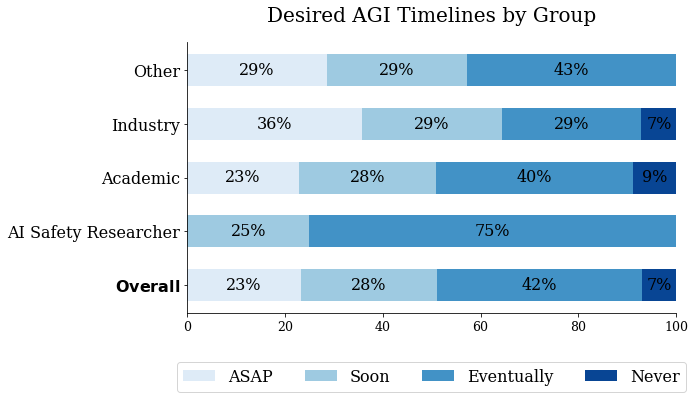

In [19]:
fig, ax = timelines_graph(df, fig_size=(10, 6), font_size_large=20, font_size_med=16, font_size_small=16, title="Desired AGI Timelines by Group", save_fig=True, show_fig=True, save_location="figs/timelines.pdf")

In [20]:
# get the answers to q5 from people who answered q1 as "industry"
df[q1 == 'Industry']

,Q1,Q5
0,Industry,ASAP
1,Industry,Soon
3,Industry,Never
4,Industry,Eventually
5,Industry,Eventually
9,Industry,ASAP
11,Industry,ASAP
12,Industry,Soon
13,Industry,ASAP
31,Industry,Soon


In [21]:
q

NameError: name 'q' is not defined